# Branch and Price

MIP problem

$(P)$

\begin{eqnarray}
\begin{array}{rcl}
& z=\min & {\displaystyle \sum_{i \in I}} c_ix_i\\
& \text{s.t.}& {\displaystyle\sum_{i \in I}} a_ix_i \geq b\\
&            & x_i \in \mathbb{Z_+}, \quad i \in I\\
\end{array}
\end{eqnarray}



$a_i$ and $b$ are column vectors.

### Cutting Stock exemple:

There is $m$ orders with widths $w_j$ each one with demand $b_j$, and the standard roll with $W$ width. 

We want to cut the ordered rolls to fullfill theirs demand by using a minimum quantity of standard rolls.


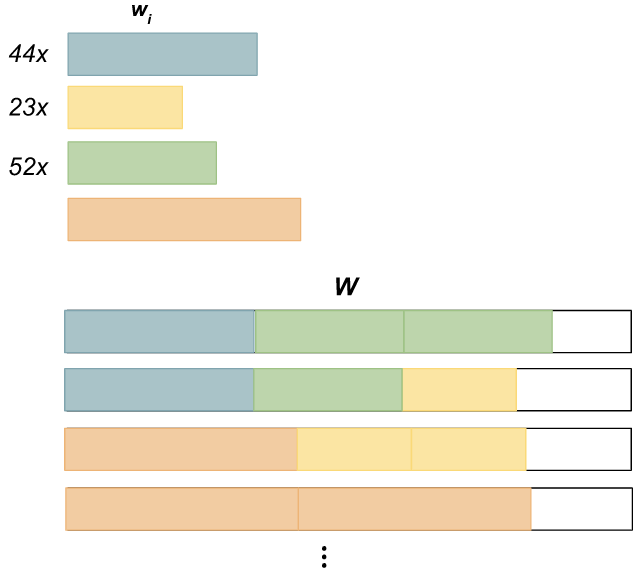

Let $I$ be the set of patterns of cut that do not violate the max roll width: 

$I = \{i \in \mathbb{Z_+}^m : \sum_{j=1}^m w_ji_j \leq W\}$.

The set $I_R$ will now on denote a subset of $I$, for exemplo, for the patterns presented in the image above it is

$I_R = \left\{\begin{bmatrix} 1\\2\\0\\0 \end{bmatrix}, \begin{bmatrix} 1\\1\\1\\0 \end{bmatrix}, \begin{bmatrix} 0\\0\\1\\1 \end{bmatrix}, \begin{bmatrix} 0\\0\\0\\2 \end{bmatrix}\right\}$

The variable $x_i$ is the amount of pattern $i$ to processed. Therefore the problem can be formulated as following:

$
\begin{eqnarray}
\begin{array}{rcl}
& \min & {\displaystyle \sum_{i \in I}} x_i\\
& \text{s.t.}& {\displaystyle\sum_{i \in I}} i_jx_i \geq b\\
&            & x_i \in \mathbb{Z_+}, \quad i \in I\\
\end{array}
\end{eqnarray}
$

### Back to the (P) problem

$I_R$ is the restricted subset of $I$, hence it defines the Restricted Master Problem $RMP$ as the linear relaxation of $P$ over $I_R$.


$(RMP)$
$
\begin{eqnarray}
\begin{array}{rcl}
z_{RMP}=& \min & {\displaystyle \sum_{i \in I_R}} c_ix_i\\
& \text{s.t.}& {\displaystyle\sum_{i \in I_R}} a_ix_i \geq b\\
& & x_i \geq 0
\end{array}
\end{eqnarray}
$

The $(RMP)$ can be represented in a compact matricial notation:

$
\begin{eqnarray}
\begin{array}{rcl}
z_{RMP}=& \min & c_Rx_R\\
& \text{s.t.}&  A_Rx_R \geq b\\
\end{array}
\end{eqnarray}
$

Let $x_R^*$ and $\pi_R^*$ the primal and dual optimum solutions of $RMP$. 

The strong duality of linear optimization problems gives $z_{RMP} = \pi_R^* b$.

Besides, consider the $z_{LP}$ the optimum value of the linear relaxation of $P$ over $I$, which is a not known value at this moment.

Despite that, as $I_R \subseteq I$ than $z_{LP} \leq z_{RMP}$.

Therefore, $\pi_R^* b$ is an upper bound for the linear relaxation of $P$. Would the equality happens here? If that is true, as $c_Rx_R^*= \pi_R^* b$ than $x_R$ is an optimum solution for the LR of $P$.

In order to awnser that question, it is intended to check if $\pi_R^*$ would be dual feasible for the LR of $P$ as well. As for simplex method, the reduced cost should be greater or equal to zero.

It should be done implicitily over the set $I$, that is, we should solve the following pricing problem:



$(PP)$ $
\begin{eqnarray}
\begin{array}{rcl}
\sigma = & \min & c_i-\pi_R^*a_i\\
& \text{s.t.}&  i \in I\\
\end{array}
\end{eqnarray}
$

Therefore, 
* if $\sigma \geq 0$ then $\pi_R$ is an dual optimum of the LR of $(P)$.
* otherwise, the optimum solution of $(PP)$ is a candidate to be a new collumn for the $(RMP)$.

### Back to Cutting stock exemple:

The columns vectors $a_i$ is not explicitily available, but it is defined through the rule that defines $I$. 

Accordingly, considering the $m$ vector variable $y$, the $PP$ problem becomes

$
\begin{eqnarray}
\begin{array}{rcl}
\sigma = & \min & 1-{\displaystyle \sum_{j=1}^m} \pi_j^*y_j\\
& \text{s.t.}& {\displaystyle \sum_{j=1}^m} w_jy_j \leq W\\
& & y_j \geq 0.\\
\end{array}
\end{eqnarray}
$ 